In [4]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy.stats import chi2_contingency

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


# <font color=pink> Data Preparation

In [5]:
#Importing dataset
CustomerData = pd.read_csv('CustmPersonalityData.csv')
CustomerData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/8/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/1/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
#Dropping duplicates
CustomerData = CustomerData.drop_duplicates()

In [8]:
#Checking if any duplicate values were dropped(No duplicates)
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
#Separating the response variable into a different dataframe
Response = pd.DataFrame(CustomerData["Response"])
Response.head()

,Response
0,1
1,0
2,0
3,0
4,0


In [10]:
#dropping the attributes which are not helpful in our analysis based on their descriptions
CustomerData = CustomerData.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

### <font color=pink> Feature Engineering

A feature engineering we decided to perform was to convert the Dt_Customer to the <font color= blue>DurationJoined, as it would be more meaningful to use the feature of how long the customer joined the company as a member. 

However, since we do not have the information of when this data was collected, we decided to just use the current year (2023) for our calculations.    
    
Secondly, we also decided to convert the <font color= blue>Year_Birth of customers to age, as that would be more meaningful than simply  knowing the year. 

In [11]:
#Converting Dt_Customer to just the year
CustomerData['Dt_Customer'] = 2023 - pd.to_datetime(CustomerData['Dt_Customer'], format='%d/%m/%Y').dt.year
CustomerData = CustomerData.rename(columns={'Dt_Customer': 'DurationJoined'})

CustomerData['Year_Birth'] = 2023 - (CustomerData['Year_Birth'])
CustomerData = CustomerData.rename(columns={'Year_Birth': 'Age'})
CustomerData.head()

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,66,Graduation,Single,58138.0,0,0,11,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,69,Graduation,Single,46344.0,1,1,9,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,58,Graduation,Together,71613.0,0,0,10,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,39,Graduation,Together,26646.0,1,0,9,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,42,PhD,Married,58293.0,1,0,9,94,173,...,3,6,5,0,0,0,0,0,0,0


Another feature engineering we decided to do was also to add another column in the dataframe: <font color = blue>TotalExpenditure, which is the sum of all the expenses of the products
    
Also combining KidHome and TeenHome, we are able to get the <font color = blue>TotalChildren, which is the total number of children at home

In [12]:
#creating an extra column with totalExpenditure
CustomerData['TotalExpenditure'] = CustomerData["MntFishProducts"] + CustomerData["MntFruits"] + CustomerData["MntGoldProds"] + CustomerData["MntSweetProducts"] + CustomerData["MntMeatProducts"] + CustomerData["MntWines"]
CustomerData['TotalChildren']=CustomerData['Kidhome']+ CustomerData['Teenhome']
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Age                  2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   DurationJoined       2240 non-null   int64  
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### <font color=pink> Checking for extreme values

In [13]:
pd.set_option('display.max_columns', None)
CustomerData.describe(include='all')

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalExpenditure,TotalChildren
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,54.194196,NaN,NaN,52247.251354,0.444196,0.506250,9.971875,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,605.798214,0.950446
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,0.684554,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,602.249288,0.751803
min,0.000000,27.000000,NaN,NaN,1730.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,2828.250000,46.000000,NaN,NaN,35303.000000,0.000000,0.000000,10.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.750000,0.000000
50%,5458.500000,53.000000,NaN,NaN,51381.500000,0.000000,0.000000,10.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,1.000000
75%,8427.750000,64.000000,NaN,NaN,68522.000000,1.000000,1.000000,10.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1045.500000,1.000000


From this description, we found out that Income has a very extreme outlier of 666666 as compared to the rest of the data, as even the 3rd quartile is nowhere near that value. Thus we decided to drop it.

In [14]:
CustomerData = CustomerData.drop(CustomerData[CustomerData['Income'] == 666666].index)
pd.set_option('display.max_columns', None)
CustomerData.describe()

,ID,Age,Income,Kidhome,Teenhome,DurationJoined,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalExpenditure,TotalChildren
count,2239.000000,2239.000000,2215.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,54.197856,51969.861400,0.443948,0.506476,9.971862,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,4.085306,2.662796,5.791425,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,0.149174,606.041090,0.950424
std,3246.372471,11.985494,21526.320095,0.538390,0.544555,0.684707,28.963662,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,1.932345,2.779240,2.923542,3.251149,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.356339,602.274089,0.751970
min,0.000000,27.000000,1730.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,2827.500000,46.000000,35284.000000,0.000000,0.000000,10.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000
50%,5455.000000,53.000000,51373.000000,0.000000,0.000000,10.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.000000,1.000000
75%,8423.500000,64.000000,68487.000000,1.000000,1.000000,10.000000,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1046.000000,1.000000
max,11191.000000,130.000000,162397.000000,2.000000,2.000000,11.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000,3.000000


### <font color = pink> Creating DataFrame of only numerical data

Dropping variables that are categorical + those that we want to convert from numerical to categorical(Kidhome, Teenhome)

In [15]:
NumericalCustomerData = CustomerData.select_dtypes(include=['int64', 'float64'])
NumericalCustomerData = NumericalCustomerData.drop(['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'ID', 'Recency', 'Response'], axis=1)

In [16]:
NumericalCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2239 non-null   int64  
 1   Income               2215 non-null   float64
 2   Kidhome              2239 non-null   int64  
 3   Teenhome             2239 non-null   int64  
 4   DurationJoined       2239 non-null   int64  
 5   MntWines             2239 non-null   int64  
 6   MntFruits            2239 non-null   int64  
 7   MntMeatProducts      2239 non-null   int64  
 8   MntFishProducts      2239 non-null   int64  
 9   MntSweetProducts     2239 non-null   int64  
 10  MntGoldProds         2239 non-null   int64  
 11  NumDealsPurchases    2239 non-null   int64  
 12  NumWebPurchases      2239 non-null   int64  
 13  NumCatalogPurchases  2239 non-null   int64  
 14  NumStorePurchases    2239 non-null   int64  
 15  NumWebVisitsMonth    2239 non-null   i

### <font color = pink> Creating DataFrame for categorical data 

In [17]:
CategoricalCustomerData = pd.DataFrame(CustomerData[[ "Education", "Marital_Status", 'Complain', "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]])
CategoricalCustomerData.head()

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,Graduation,Single,0,0,0,0,0,0
1,Graduation,Single,0,0,0,0,0,0
2,Graduation,Together,0,0,0,0,0,0
3,Graduation,Together,0,0,0,0,0,0
4,PhD,Married,0,0,0,0,0,0


In [18]:
CategoricalCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2239 non-null   object
 1   Marital_Status  2239 non-null   object
 2   Complain        2239 non-null   int64 
 3   AcceptedCmp1    2239 non-null   int64 
 4   AcceptedCmp2    2239 non-null   int64 
 5   AcceptedCmp3    2239 non-null   int64 
 6   AcceptedCmp4    2239 non-null   int64 
 7   AcceptedCmp5    2239 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 157.4+ KB


In [19]:
#Checking the unique categories in each categorical variable that are not 0 and 1 
print("The different categories for Education are:", end=" ")
print(pd.unique(CustomerData["Education"]))
print(CustomerData['Education'].value_counts())
print("")
print("The different categories for Marital Status are:", end=" ")
print(pd.unique(CustomerData["Marital_Status"]))
print(CustomerData['Marital_Status'].value_counts())
print("")

The different categories for Education are: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

The different categories for Marital Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



In [20]:
#Dropping miscellaneous values for Marital_Status
CustomerData = CustomerData[CustomerData['Marital_Status'] != 'YOLO']
CustomerData = CustomerData[CustomerData['Marital_Status'] != 'Absurd']

In [21]:
#Combining the Alone and Single categories for Marital_Status since they have the same meaning 
CustomerData['Marital_Status'] = CustomerData['Marital_Status'].replace(['Single', 'Alone'], 'Single')
#reassigning CategoricalCustomerData so that the changes done above are updated
CategoricalCustomerData = pd.DataFrame(CustomerData[[ "Education", "Marital_Status", 'Complain', "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]])

In [22]:
#Checking if combination is successful 
print("The different categories for Marital Status are:", end=" ")
print(pd.unique(CategoricalCustomerData["Marital_Status"]))
print(CategoricalCustomerData['Marital_Status'].value_counts())

The different categories for Marital Status are: ['Single' 'Together' 'Married' 'Divorced' 'Widow']
Married     864
Together    579
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64


In [23]:
#Checking final number of datapoints for categorical dataframe 
CategoricalCustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Education       2235 non-null   object
 1   Marital_Status  2235 non-null   object
 2   Complain        2235 non-null   int64 
 3   AcceptedCmp1    2235 non-null   int64 
 4   AcceptedCmp2    2235 non-null   int64 
 5   AcceptedCmp3    2235 non-null   int64 
 6   AcceptedCmp4    2235 non-null   int64 
 7   AcceptedCmp5    2235 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 157.1+ KB


### <font color = pink> Editing CustomerData dataframe to drop miscellaneous values for marital status
    

In [24]:
CustomerData = CustomerData[CustomerData['Marital_Status'] != 'YOLO']
CustomerData = CustomerData[CustomerData['Marital_Status'] != 'Absurd']

In [25]:
CustomerData['Marital_Status'] = CustomerData['Marital_Status'].replace(['Single', 'Alone'], 'Single')

In [26]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2235 non-null   int64  
 1   Age                  2235 non-null   int64  
 2   Education            2235 non-null   object 
 3   Marital_Status       2235 non-null   object 
 4   Income               2211 non-null   float64
 5   Kidhome              2235 non-null   int64  
 6   Teenhome             2235 non-null   int64  
 7   DurationJoined       2235 non-null   int64  
 8   Recency              2235 non-null   int64  
 9   MntWines             2235 non-null   int64  
 10  MntFruits            2235 non-null   int64  
 11  MntMeatProducts      2235 non-null   int64  
 12  MntFishProducts      2235 non-null   int64  
 13  MntSweetProducts     2235 non-null   int64  
 14  MntGoldProds         2235 non-null   int64  
 15  NumDealsPurchases    2235 non-null   i

In [27]:
CustomerData=CustomerData.dropna()

In [28]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2211 non-null   int64  
 1   Age                  2211 non-null   int64  
 2   Education            2211 non-null   object 
 3   Marital_Status       2211 non-null   object 
 4   Income               2211 non-null   float64
 5   Kidhome              2211 non-null   int64  
 6   Teenhome             2211 non-null   int64  
 7   DurationJoined       2211 non-null   int64  
 8   Recency              2211 non-null   int64  
 9   MntWines             2211 non-null   int64  
 10  MntFruits            2211 non-null   int64  
 11  MntMeatProducts      2211 non-null   int64  
 12  MntFishProducts      2211 non-null   int64  
 13  MntSweetProducts     2211 non-null   int64  
 14  MntGoldProds         2211 non-null   int64  
 15  NumDealsPurchases    2211 non-null   i

# <font color=pink> Exploratory Data Analysis

### <font color = pink> Numerical type
    

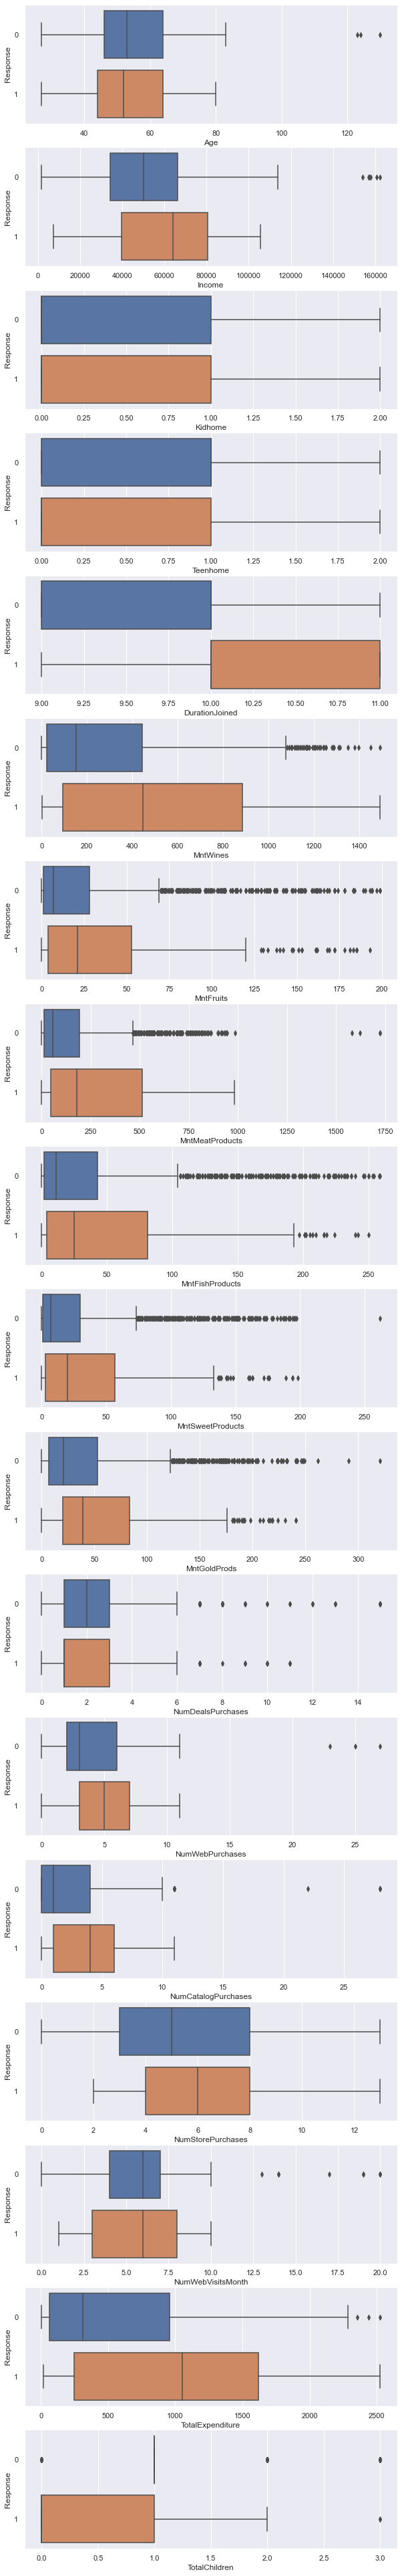

In [29]:
f, axes = plt.subplots(18,1, figsize=(10,70))
ConcatDF = pd.concat([NumericalCustomerData, Response], axis = 1).reindex(NumericalCustomerData.index)

count = 0
for var in NumericalCustomerData:
    sb.boxplot(x = ConcatDF[var], y = "Response", data = CustomerData, orient = "h",ax = axes[count])
    count += 1

Significant difference in the Box Plots of a continuous variable against multiple levels of a categorical variable tells us that the continuous variable is "important" in differentiating between the levels of the categorical variable. 

Observations made:
1. Year_Birth has close to no relation with response as median is very similar 
2. Kidhome, Teenhome, DurationJoined and have no distinct medians. Thus, upon doing further exploratory analysis, we found that these 3 variables take 3 discrete values as shown in the next block of code. 

In [30]:
# From the first observation, we thus decided to drop the Year_Birth from our numerical dataframe
NumericalCustomerData = CustomerData.drop(['Age'],axis=1)

In [31]:
print("The different categories for Kidhome are:", end=" ")
print(pd.unique(CustomerData["Kidhome"]))
print(CustomerData['Kidhome'].value_counts())
print("")
print("The different categories for Teenhome are:", end=" ")
print(pd.unique(CustomerData["Teenhome"]))
print(CustomerData['Teenhome'].value_counts())
print("")
print("The different categories for TotalChildren are:", end=" ")
print(pd.unique(CustomerData["TotalChildren"]))
print(CustomerData['TotalChildren'].value_counts())
print("")
print("The different categories for DurationJoined are:", end=" ")
print(pd.unique(CustomerData["DurationJoined"]))
print(CustomerData['DurationJoined'].value_counts())
print("")

The different categories for Kidhome are: [0 1 2]
0    1279
1     886
2      46
Name: Kidhome, dtype: int64

The different categories for Teenhome are: [0 1 2]
0    1144
1    1016
2      51
Name: Teenhome, dtype: int64

The different categories for TotalChildren are: [0 2 1 3]
1    1114
0     631
2     416
3      50
Name: TotalChildren, dtype: int64

The different categories for DurationJoined are: [11  9 10]
10    1172
9      552
11     487
Name: DurationJoined, dtype: int64



Thus,  Kidhome, Teenhome, DurationJoined can be converted into categorical data as they only take 3 discrete values.


TotalChildren can also be considered categorical since it only takes 4 discrete values.

In [32]:
#Creating new dataframe for linear regression(dropping all the amounts)
NewNumerical = NumericalCustomerData.drop(['MntWines', 'MntFruits' ,'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis =1)
NewNumerical.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalExpenditure,TotalChildren
0,5524,Graduation,Single,58138.0,0,0,11,58,3,8,10,4,7,0,0,0,0,0,0,1,1617,0
1,2174,Graduation,Single,46344.0,1,1,9,38,2,1,1,2,5,0,0,0,0,0,0,0,27,2
2,4141,Graduation,Together,71613.0,0,0,10,26,1,8,2,10,4,0,0,0,0,0,0,0,776,0
3,6182,Graduation,Together,26646.0,1,0,9,26,2,2,0,4,6,0,0,0,0,0,0,0,53,1
4,5324,PhD,Married,58293.0,1,0,9,94,5,5,3,6,5,0,0,0,0,0,0,0,422,1


In [33]:
NewNumerical.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalExpenditure,TotalChildren
0,5524,Graduation,Single,58138.0,0,0,11,58,3,8,10,4,7,0,0,0,0,0,0,1,1617,0
1,2174,Graduation,Single,46344.0,1,1,9,38,2,1,1,2,5,0,0,0,0,0,0,0,27,2
2,4141,Graduation,Together,71613.0,0,0,10,26,1,8,2,10,4,0,0,0,0,0,0,0,776,0
3,6182,Graduation,Together,26646.0,1,0,9,26,2,2,0,4,6,0,0,0,0,0,0,0,53,1
4,5324,PhD,Married,58293.0,1,0,9,94,5,5,3,6,5,0,0,0,0,0,0,0,422,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


<AxesSubplot:>

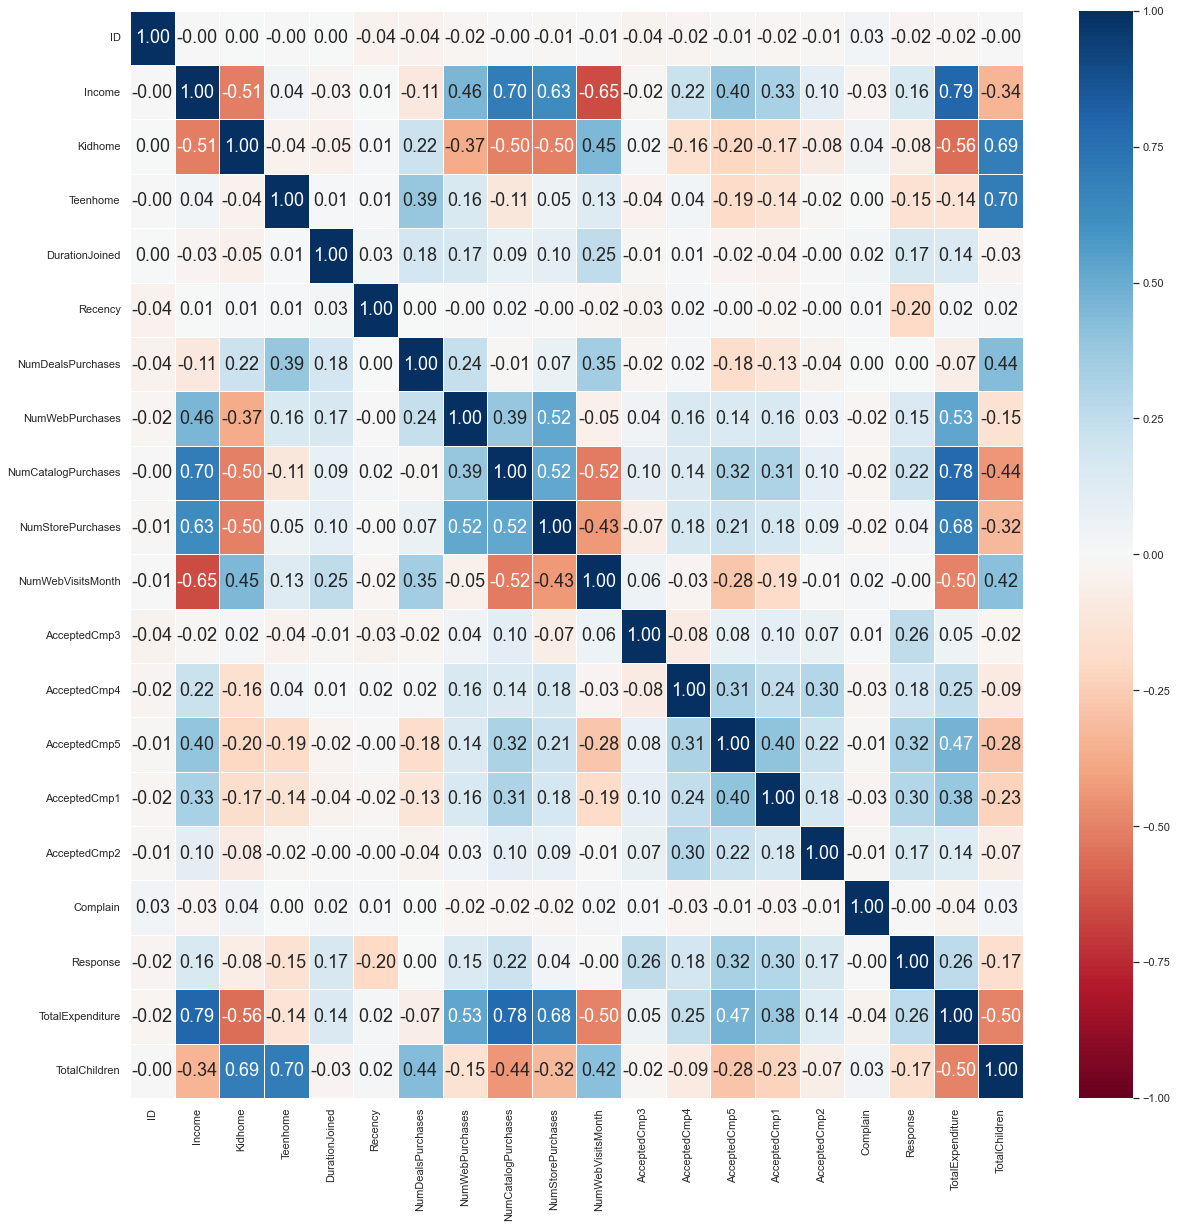

In [34]:

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(NewNumerical.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [35]:
#Extracting variables with high correlation to total expenditure 
LinearDF = pd.DataFrame(NewNumerical[['Income', 'NumCatalogPurchases', 'NumStorePurchases']])
LinearDF.head()

,Income,NumCatalogPurchases,NumStorePurchases
0,58138.0,10,4
1,46344.0,1,2
2,71613.0,2,10
3,26646.0,0,4
4,58293.0,3,6


## <font color = pink> Categorical type
    
Based on EDA of categorical data, whether or not a customer lodged a complained in the last 2 years does not have a large relation on whether they participated in the latest campaign. Therefore, we will drop the 'complain' variable and not use it for our machine learning models. 

In [36]:
CategoricalCustomerData = pd.DataFrame(CustomerData[[ "Education", "Marital_Status", 'Complain', "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Kidhome", "Teenhome", "DurationJoined","TotalChildren"]])
CategoricalCustomerData.head()

,Education,Marital_Status,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Kidhome,Teenhome,DurationJoined,TotalChildren
0,Graduation,Single,0,0,0,0,0,0,0,0,11,0
1,Graduation,Single,0,0,0,0,0,0,1,1,9,2
2,Graduation,Together,0,0,0,0,0,0,0,0,10,0
3,Graduation,Together,0,0,0,0,0,0,1,0,9,1
4,PhD,Married,0,0,0,0,0,0,1,0,9,1


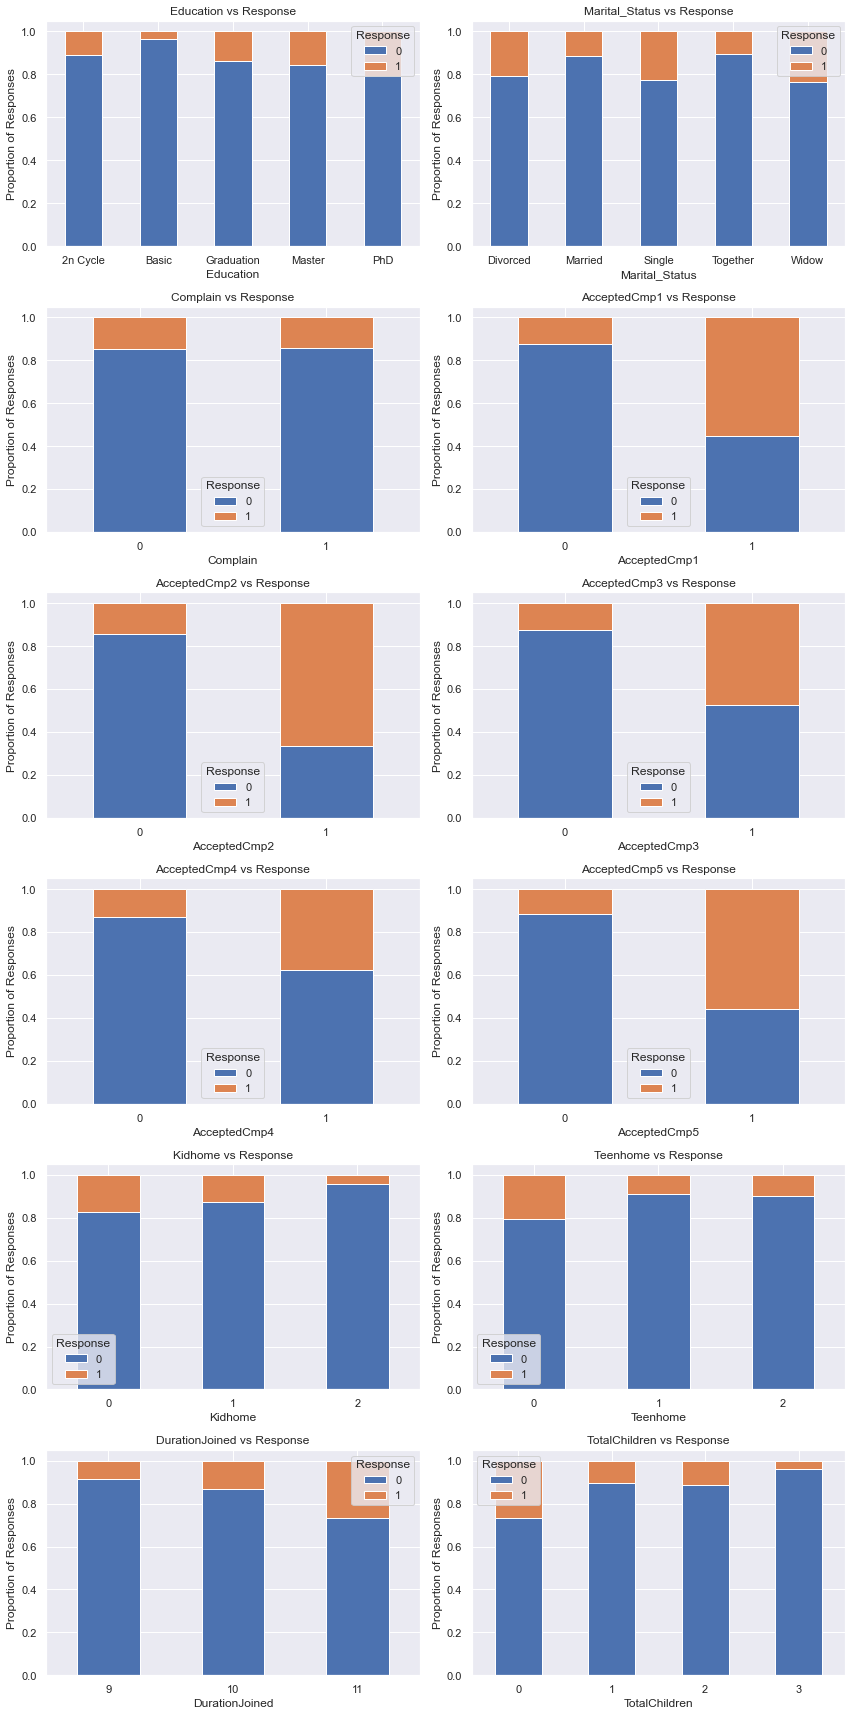

In [37]:
# Determine the number of rows and columns for the subplots
num_cols = 2
num_rows = len(CategoricalCustomerData.columns) // num_cols
if len(CategoricalCustomerData.columns) % num_cols != 0:
    num_rows += 1

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 24))

# Flatten the axs array to make it easier to iterate over
axs = axs.flatten()

# Iterate over the categorical variables and plot each normalized contingency table on a separate subplot
for i, col in enumerate(CategoricalCustomerData.columns):
    
    # Create a normalized contingency table of the column and the "Response" variable
    contingency_table = pd.crosstab(CategoricalCustomerData[col], Response["Response"], normalize='index')
    
    # Plot the bar graph on the appropriate subplot, using red and green for "No" and "Yes" responses
    contingency_table.plot(kind='bar', ax=axs[i],stacked=True)
    
    # Set the title and labels for the subplot
    axs[i].set_title(f"{col} vs Response")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Proportion of Responses")
    
    # Rotate the x-axis labels if necessary
    axs[i].tick_params(axis='x', rotation=0)
    

# If the number of columns is odd, hide the last subplot
if len(CategoricalCustomerData.columns) % num_cols != 0:
    axs[-1].axis('off')

# Display the subplots
plt.tight_layout()
plt.show()

### <font color = pink> Splitting DataSet into People(6), Products(6), Promotion(6), Places(3)

For People DF: Dropped Year_Birth because from the EDA(plotting boxplots of var against response), there was no obvious/significant correlation between Year birth and response. There is only a very slight difference in the median pf year_birth for response = 0 and response = 1.
    
    
For Place DF: Dropped NumWebVisitsMonth as there is no obvious correlation. The median for the variable for response =0 and response = 1 seems to be the same. 

In [38]:
People = pd.DataFrame(CustomerData[["Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "DurationJoined", "Response"]])
People.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined,Response
0,Graduation,Single,58138.0,0,0,11,1
1,Graduation,Single,46344.0,1,1,9,0
2,Graduation,Together,71613.0,0,0,10,0
3,Graduation,Together,26646.0,1,0,9,0
4,PhD,Married,58293.0,1,0,9,0


In [39]:
People.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2211 non-null   object 
 1   Marital_Status  2211 non-null   object 
 2   Income          2211 non-null   float64
 3   Kidhome         2211 non-null   int64  
 4   Teenhome        2211 non-null   int64  
 5   DurationJoined  2211 non-null   int64  
 6   Response        2211 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 202.7+ KB


In [40]:
Products = pd.DataFrame(CustomerData[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts","MntSweetProducts","MntGoldProds", "Response"]])
Products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MntWines          2211 non-null   int64
 1   MntFruits         2211 non-null   int64
 2   MntMeatProducts   2211 non-null   int64
 3   MntFishProducts   2211 non-null   int64
 4   MntSweetProducts  2211 non-null   int64
 5   MntGoldProds      2211 non-null   int64
 6   Response          2211 non-null   int64
dtypes: int64(7)
memory usage: 202.7 KB


In [41]:
Promotion = pd.DataFrame(CustomerData[["NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]])
Promotion.head()
People.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2211 non-null   object 
 1   Marital_Status  2211 non-null   object 
 2   Income          2211 non-null   float64
 3   Kidhome         2211 non-null   int64  
 4   Teenhome        2211 non-null   int64  
 5   DurationJoined  2211 non-null   int64  
 6   Response        2211 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 202.7+ KB


In [42]:
Place = pd.DataFrame(CustomerData[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "Response"]])
Place.head()
Place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2211 entries, 0 to 2239
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NumWebPurchases      2211 non-null   int64
 1   NumCatalogPurchases  2211 non-null   int64
 2   NumStorePurchases    2211 non-null   int64
 3   Response             2211 non-null   int64
dtypes: int64(4)
memory usage: 150.9 KB


# <font color = black> Dropping Response from the dataframes

In [43]:
#For People
People = People.drop('Response', axis = 1)
People.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined
0,Graduation,Single,58138.0,0,0,11
1,Graduation,Single,46344.0,1,1,9
2,Graduation,Together,71613.0,0,0,10
3,Graduation,Together,26646.0,1,0,9
4,PhD,Married,58293.0,1,0,9


In [44]:
#For products
Products = Products.drop('Response', axis = 1)
Products.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [45]:
#For promotion
Promotion = Promotion.drop('Response', axis = 1)
Promotion.head()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,3,0,0,0,0,0
1,2,0,0,0,0,0
2,1,0,0,0,0,0
3,2,0,0,0,0,0
4,5,0,0,0,0,0


# <font color=black> MACHINE LEARNING MODELS

# <font color = black> Prediciting Total Expenditure: Multi-variate Linear Regression

# <font color=pink> Applying Linear Regression

In [47]:
LinearDF

,Income,NumCatalogPurchases,NumStorePurchases
0,58138.0,10,4
1,46344.0,1,2
2,71613.0,2,10
3,26646.0,0,4
4,58293.0,3,6
...,...,...,...
2235,61223.0,3,4
2236,64014.0,2,5
2237,56981.0,3,13
2238,69245.0,5,10


In [48]:
TotalExpenditure = pd.DataFrame(CustomerData['TotalExpenditure'])
TotalExpenditure.head()

,TotalExpenditure
0,1617
1,27
2,776
3,53
4,422


Intercept of Regression 	: b =  [-406.12260598]
Coefficients of Regression 	: a =  [[1.03476498e-02 8.01731461e+01 4.52023669e+01]]

            Predictors  Coefficients
0               Income      0.010348
1  NumCatalogPurchases     80.173146
2    NumStorePurchases     45.202367



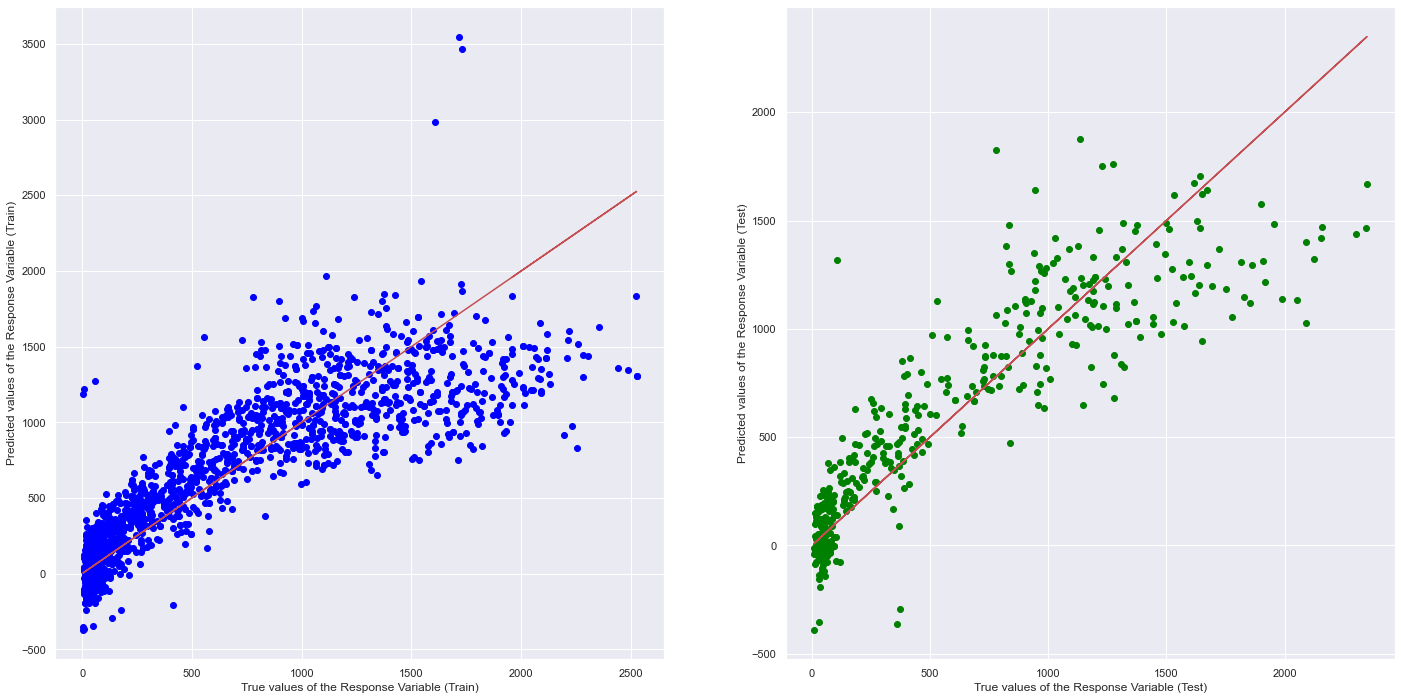

In [49]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(CustomerData["TotalExpenditure"])
X = pd.DataFrame(CustomerData[['Income', 'NumCatalogPurchases', 'NumStorePurchases']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train["TotalExpenditure"], y_train_pred, color = "blue")
axes[0].plot(y_train["TotalExpenditure"], y_train["TotalExpenditure"], 'r-', linewidth = 1.5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test["TotalExpenditure"], y_test_pred, color = "green")
axes[1].plot(y_test["TotalExpenditure"], y_test["TotalExpenditure"], 'r-', linewidth = 1.5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()



In [50]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7566474919581749
Root Mean Squared Error (MSE) 	: 299.5914000295622

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7885293738503433
Root Mean Squared Error (MSE) 	: 268.9880210375108



In [51]:
CustomerData["TotalExpenditure"].describe()

count    2211.000000
mean      606.957938
std       603.188129
min         5.000000
25%        69.000000
50%       396.000000
75%      1047.500000
max      2525.000000
Name: TotalExpenditure, dtype: float64

# <Font color = pink> Final Conclusion for Linear Regression

The explained variance for our multi variate linear regression model is relatively close to 1. Furthermore, the root mean squared error is relatively low compared to the range of our response variable, TotalExpenditure(5-2525). 

This indicates that the independent variables(Income, NumCatalogPurchases, NumStorePurchases) are good predictors of our response variable(TotalExpenditure).

# <font color = pink> Link to Problem Statement

In conclusion, the company can focus on providing a range of products that caters to both lower and higher income groups in order to raise expenditure on both ends. Since, the company provides different avenues for customers to purchase their products(web, catalog and in-store), this regression shows that they can focus on their catalog and in-store purchases to further boost sales since they affect total expenditure to a greater extent as compared to web purchases. 

# <font color = black> Prediciting Responses to Campaign

## <font color=black> ML Model 1: Support Vector Machine

# <font color=pink> Applying Support Vector Machines on first dataframe: People

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [158]:
#converting Education and Marital Status into numeric 
People['Education'] = People['Education'].replace(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], [2,4,3,0,1])
People['Marital_Status'] = People['Marital_Status'].replace(['Single', 'Together', 'Married', 'Divorced', 'Widow'], [0,1,2,3,4])
People.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,DurationJoined
0,2,0,58138.0,0,0,11
1,2,0,46344.0,1,1,9
2,2,1,71613.0,0,0,10
3,2,1,26646.0,1,0,9
4,4,2,58293.0,1,0,9


In [159]:
PeopleMulti = pd.DataFrame(People[["Education", "Marital_Status", "Income", "DurationJoined", "Kidhome", "Teenhome"]])
PeopleMulti.head()

,Education,Marital_Status,Income,DurationJoined,Kidhome,Teenhome
0,2,0,58138.0,11,0,0
1,2,0,46344.0,9,1,1
2,2,1,71613.0,10,0,0
3,2,1,26646.0,9,1,0
4,4,2,58293.0,9,1,0


In [55]:
Response = pd.DataFrame(CustomerData['Response'])

In [56]:
#Peforming random splitting on the dataset 
#Random split into train and test set
People_train, People_test, Response_train, Response_test = train_test_split(PeopleMulti, Response, test_size = 0.2)

# Check the sample sizes
print("Train Set :", Response_train.shape, People_train.shape)
print("Test Set  :", Response_test.shape, People_test.shape)

Train Set : (1768, 1) (1768, 6)
Test Set  : (443, 1) (443, 6)


In [57]:
#scaling the data so that svm works better
scaler = StandardScaler()
People_train_scaled = scaler.fit_transform(People_train)
People_test_scaled = scaler.transform(People_test)

In [58]:
#instantiate SVM model
clf = SVC(kernel='linear')

In [55]:
#Train the SVM Model with the train set
clf.fit(People_train_scaled, Response_train.values.ravel())

SVC(kernel='linear')

In [56]:
# Predict the Repsonse values from Predictors
Response_test_pred = clf.predict(People_test_scaled)

In [57]:
Response_train_pred = clf.predict(People_train_scaled)

In [58]:
#Checking the accuracy of the model
accuracy_score(Response_test, Response_test_pred)

0.8668171557562077

In [59]:
accuracy_score(Response_train, Response_train_pred)

0.8461538461538461

<AxesSubplot:>

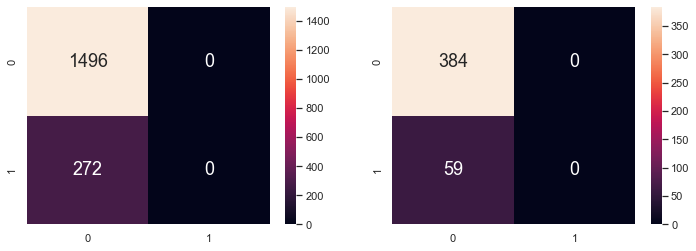

In [60]:
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Response_train, Response_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Response_test, Response_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# <font color=pink> Applying Support Vector Machines on second dataframe: Products

In [61]:
Products.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [62]:
Response = pd.DataFrame(CustomerData['Response'])

In [63]:
#Peforming random splitting on the dataset 
#Random split into train and test set
Products_train, Products_test, ResponseProducts_train, ResponseProducts_test = train_test_split(Products, Response, test_size = 0.2)

# Check the sample sizes
print("Train Set :", ResponseProducts_train.shape, Products_train.shape)
print("Test Set  :", ResponseProducts_test.shape, Products_test.shape)

Train Set : (1768, 1) (1768, 6)
Test Set  : (443, 1) (443, 6)


In [64]:
#scaling the data so that svm works better
scaler = StandardScaler()
Products_train_scaled = scaler.fit_transform(Products_train)
Products_test_scaled = scaler.transform(Products_test)

In [65]:
#instantiate SVM model
clfProducts = SVC(kernel='linear')

In [66]:
#Train the SVM Model with the train set
clfProducts.fit(Products_train_scaled, ResponseProducts_train.values.ravel())

SVC(kernel='linear')

In [67]:
# Predict the Repsonse values from Predictors
ResponseProducts_test_pred = clfProducts.predict(Products_test_scaled)

In [68]:
ResponseProducts_train_pred = clfProducts.predict(Products_train_scaled)

In [69]:
#Checking the accuracy of the model
accuracy_score(ResponseProducts_test, ResponseProducts_test_pred)

0.8510158013544018

In [70]:
accuracy_score(ResponseProducts_train, ResponseProducts_train_pred)

0.8501131221719457

<AxesSubplot:>

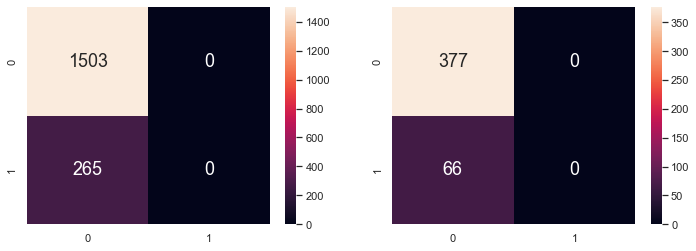

In [71]:
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ResponseProducts_train, ResponseProducts_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ResponseProducts_test, ResponseProducts_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# <font color = pink> Applying Support Vector Machines on third dataframe: Promotion

In [72]:
Promotion.head()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,3,0,0,0,0,0
1,2,0,0,0,0,0
2,1,0,0,0,0,0
3,2,0,0,0,0,0
4,5,0,0,0,0,0


In [73]:
Response = pd.DataFrame(CustomerData['Response'])

In [74]:
#Peforming random splitting on the dataset 
#Random split into train and test set
Promotion_train, Promotion_test, ResponsePromo_train, ResponsePromo_test = train_test_split(Promotion, Response, test_size = 0.2)

# Check the sample sizes
print("Train Set :", ResponsePromo_train.shape, Promotion_train.shape)
print("Test Set  :",ResponsePromo_test.shape, Promotion_test.shape)

Train Set : (1768, 1) (1768, 6)
Test Set  : (443, 1) (443, 6)


In [75]:
#scaling the data so that svm works better
scaler = StandardScaler()
Promotion_train_scaled = scaler.fit_transform(Promotion_train)
Promotion_test_scaled = scaler.transform(Promotion_test)

In [76]:
#instantiate SVM model
clfPromotion = SVC(kernel='linear')

In [77]:
#Train the SVM Model with the train set
clfPromotion.fit(Promotion_train_scaled, ResponsePromo_train.values.ravel())

SVC(kernel='linear')

In [78]:
# Predict the Repsonse values from Predictors
ResponsePromo_test_pred = clf.predict(Promotion_test_scaled)
ResponsePromo_train_pred = clf.predict(Promotion_train_scaled)

In [79]:
#Checking the accuracy of the model
accuracy_score(ResponsePromo_test, ResponsePromo_test_pred)

0.8329571106094809

In [80]:
accuracy_score(ResponsePromo_train, ResponsePromo_train_pred)

0.8546380090497737

<AxesSubplot:>

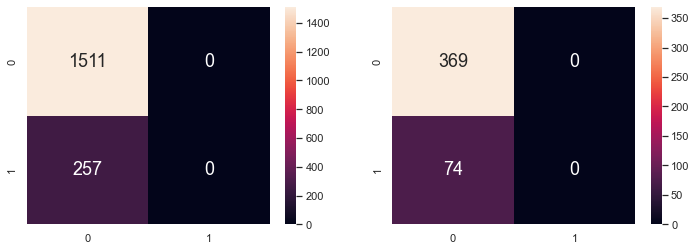

In [81]:
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ResponsePromo_train, ResponsePromo_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ResponsePromo_test, ResponsePromo_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# <font color = pink> Applying Support Vector Machines on first dataframe: Places

In [82]:
Place = Place.drop('Response', axis = 1)

In [83]:
Place.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6


In [84]:
#Peforming random splitting on the dataset 
#Random split into train and test set
Place_train, Place_test, ResponsePlace_train, ResponsePlace_test = train_test_split(Promotion, Response, test_size = 0.2)

# Check the sample sizes
print("Train Set :", ResponsePlace_train.shape, Place_train.shape)
print("Test Set  :",ResponsePlace_test.shape, Place_test.shape)

Train Set : (1768, 1) (1768, 6)
Test Set  : (443, 1) (443, 6)


In [85]:
#scaling the data so that svm works better
scaler = StandardScaler()
Place_train_scaled = scaler.fit_transform(Place_train)
Place_test_scaled = scaler.transform(Place_test)

In [86]:
#instantiate SVM model
clfPlace = SVC(kernel='linear')

In [87]:
#Train the SVM Model with the train set
clfPlace.fit(Place_train_scaled, ResponsePlace_train.values.ravel())

SVC(kernel='linear')

In [88]:
# Predict the Repsonse values from Predictors
ResponsePlace_test_pred = clf.predict(Place_test_scaled)
ResponsePlace_train_pred = clf.predict(Place_train_scaled)

In [89]:
#Checking the accuracy of the model
accuracy_score(ResponsePlace_test, ResponsePlace_test_pred)

0.8465011286681715

In [90]:
accuracy_score(ResponsePlace_train, ResponsePlace_train_pred)

0.8512443438914027

<AxesSubplot:>

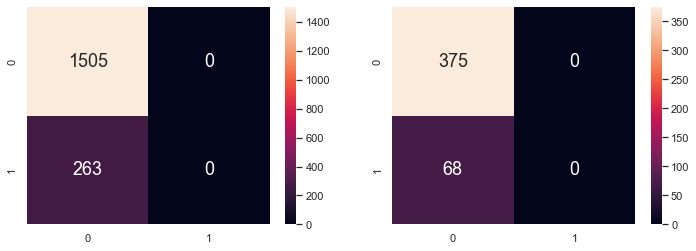

In [91]:
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(ResponsePlace_train, ResponsePlace_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(ResponsePlace_test, ResponsePlace_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# <font color = pink> Observations
    From the confusion matrix of all datasets, 
    

# <font color = pink> Final conclusion for Support Vector Machine Model
    
    Good at predicting true negatives but very poor at predicted true positives. However, overall classification accuracy is generally high, usually taking a value of roughly 0.85. Classification accuracy is the highest for Place dataframe. Using the SVM Model on the test set for Place dataframe gives a classification accuracy of 0.871. 

## <font color=black> ML Model 2: Clustering

# <font color=pink> Applying Clustering on specific attributes of our dataset
    
#### We decided to choose only 3 attributes to perform clustering, as using <font color=blue>too many features for clustering could lead overfitting of data. 
#### Furthermore, having too many features for clustering could become <font color=blue>too difficult for clustering as the distance between the data points increases.
    
### The 3 attributes we decided to use are: 
    1. Income
    2. TotalExpenditure
    3. TotalChildren
  
The reason for using these 3 is because: based on our EDA earlier, we noted that these 3 were the most significant in terms of the median differing from that of the Response. Thus based on this, it seems that these 3 are the most worth exploring and clustering, just to see how our responses are going to be affected by such.

In [92]:
#importing the relevant libraries to perform clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [93]:
# create a new dataframe with modified columns, converted all the objects to integers so that it is easier to work with
df =pd.DataFrame(CustomerData[['Income', 'TotalExpenditure', 'TotalChildren','Response']])
## Peforming random splitting on the dataset 
#Random split into train and test set
customer_train, customer_test, Response_train, Response_test = train_test_split(df, Response, test_size = 0.2)

# Check the sample sizes
print("Train Set :", Response_train.shape, customer_train.shape)
print("Test Set  :", Response_test.shape, customer_test.shape)

Train Set : (1768, 1) (1768, 4)
Test Set  : (443, 1) (443, 4)


In [94]:
# Select the features to cluster
features = ['Income', 'TotalExpenditure', 'TotalChildren']
X_train = customer_train[features]

# Perform KMeans clustering for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

# Plot the SSE vs k
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

We need to select the value of k at which the decrease in SSE is no longer significant, which means that adding more clusters does not significantly improve the SSE. Thus, the optimal number of cluster based on the plot is <font color = blue> 3.

In [170]:
from sklearn.preprocessing import StandardScaler

# Select the features to scale
features = ['Income', 'TotalExpenditure', 'TotalChildren']
X_train = customer_train[features]
X_test = customer_test[features]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = scaler.transform(X_train)

# Perform KMeans clustering on the scaled data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
kmeans.fit(X_train_scaled)

# Print the cluster labels for each data point
print(kmeans.labels_)

[0 1 2 ... 1 1 1]


In [169]:
X_train.describe()

,Income,TotalExpenditure,TotalChildren
count,1768.000000,1768.000000,1768.000000
mean,51989.382919,604.497738,0.936652
std,21921.139738,604.168558,0.739731
min,1730.000000,5.000000,0.000000
25%,34935.000000,69.000000,0.000000
50%,51371.000000,391.000000,1.000000
75%,69068.250000,1045.500000,1.000000
max,162397.000000,2525.000000,3.000000


In [171]:
X_train = X_train.assign(ClusterLabel= kmeans.labels_)
X_train.groupby("ClusterLabel").agg({"Income":"median", "TotalExpenditure":"median", "TotalChildren":"median"}).round()

,Income,TotalExpenditure,TotalChildren
ClusterLabel,,,
0,44240.0,92.0,2.0
1,36287.0,102.0,1.0
2,72635.0,1214.0,0.0


#### Trying to intepret the clusters:


**ClusterLabel 0**: Customers with a bit lower than average income, low TotalExpenditure, and have 2 children.</br>              <font color = blue>These are the customers who are have a family, earn lower than average, spend less.  
                
**ClusterLabel 1** : Customers with higher than average income, higher than average expenditure, and have 0 child. </br>
<font color = blue>These are the customers who have no children, have average earnings but high spendings.

**ClusterLabel 2**: Customers with lower income, low TotalExpenditure, and have 1 child.</br>
<font color = blue>These are the customers who have a family, earn less, and low spendings.

In [ ]:
# Scale the test set using the same scaler used for the training set
X_test_scaled = scaler.transform(customer_test[features])

# Predict the cluster labels for the scaled test data using the trained KMeans model
test_cluster_labels = kmeans.predict(X_test_scaled)

# Print the cluster labels for the test data
print(test_cluster_labels)

In [ ]:
# Calculate silhouette score for the training set
train_silhouette = silhouette_score(X_train_scaled, kmeans.labels_)
print(f"Training set silhouette score: {train_silhouette:.3f}")

# Scale the test set using the same scaler used for the training set
X_test_scaled = scaler.transform(customer_test[features])

# Predict the cluster labels for the scaled test data using the trained KMeans model
test_cluster_labels = kmeans.predict(X_test_scaled)

# Calculate silhouette score for the test set
test_silhouette = silhouette_score(X_test_scaled, test_cluster_labels)
print(f"Test set silhouette score: {test_silhouette:.3f}")

After trying to use the silhoutte scores to evaluate the quality of clusters created by using the Kmeans algorithm, the scores of 0.4 tells us that the clusters are reasonably well-defined. But since the scores are not that high, this means that there could still be room for improvement. 

## <font color=pink> Using Regression to predict the probability of Response (to a campaign).

In [ ]:
# Add cluster labels to original dataframe
customer_train['ClusterLabel'] = kmeans.predict(X_train_scaled)

customer_test['ClusterLabel'] = kmeans.predict(X_test_scaled)
print(customer_test.head())
print(customer_train.head())

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the features and response variable
features = ['ClusterLabel']
response = 'Response'

# Split the training data into features and response
X_train = customer_train[features]
y_train = customer_train[response]

# Split the test data into features and response
X_test = customer_test[features]
y_test = customer_test[response]

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=0)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict the response probabilities for the test data
response_probs = log_reg.predict_proba(X_test)[:, 1]

# Print the response probabilities for the test data
print(response_probs)

From this, we can tell that ClusterLabel 2 is the most likely to respond to the campaign, as it has the highest probability of 0.17. <font color=blue> (ClusterLabel 2 are the customers who have a family, earn less, and low spendings.) 

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Select the features to scale
features = ['Income', 'TotalExpenditure', 'TotalChildren','ClusterLabel']
X_train = customer_train[features]
X_test = customer_test[features]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
clf = SVC(kernel='linear')

# Train the SVM classifier on the scaled training data
clf.fit(X_train_scaled, y_train)

# Compute the accuracy of the logistic regression model on the training set
train_accuracy = clf.score(X_train_scaled, y_train)
print("Training accuracy:", train_accuracy)

# Compute the accuracy of the logistic regression model on the testing set
test_accuracy = clf.score(X_test_scaled, y_test)
print("Testing accuracy:", test_accuracy)

KeyError: "['ClusterLabel'] not in index"

In [167]:
from sklearn.linear_model import LogisticRegression

# Define the features and response variable
features = ['Income', 'TotalExpenditure', 'TotalChildren']
response = 'Response'

# Split the training data into features and response
X_train = customer_train[features]
y_train = customer_train[response]

# Split the test data into features and response
X_test = customer_test[features]
y_test = customer_test[response]

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=0)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Compute the accuracy of the logistic regression model on the training set
train_accuracy = log_reg.score(X_train, y_train)
print("Training accuracy:", train_accuracy)

# Compute the accuracy of the logistic regression model on the test set
test_accuracy = log_reg.score(X_test, y_test)
print("Test accuracy:", test_accuracy)

Training accuracy: 0.8461538461538461
Test accuracy: 0.8555304740406321


## <font color = pink> Final Conclusion for Clustering:
    Thus from this we can tell that although clustering does indeed improve the accuracy of the data, it is not that significant in terms of improvement of accuracy in prediction of whether or not a customer response to the latest campaign. 

In [ ]:
People

## <font color=black> ML Model 3: Random Forest

# <font color = pink> People Dataset

## Cross validate to find the best hyperparameters for Random Forerst algorithm 
## Randomized Search 

In [335]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
# Extract Response and Predictors
y = pd.DataFrame(Response)
X = pd.DataFrame(PeopleMulti)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [163]:
# define the parameter distributions to search over
param_dist = {'n_estimators': [100,200,300,400,500],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [10, 20, 30, 40, 50, None],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 5),
              'bootstrap': [True, False]}

# create the classifier object
rfc = RandomForestClassifier(random_state=42)

# create the scoring function
f1_scorer = make_scorer(f1_score)

# create the randomized search object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, scoring=f1_scorer)

y_train=np.ravel(y_train)
# fit the randomized search object to the data
random_search.fit(X_train, y_train)

# get the best parameters and the corresponding mean cross-validated score
print('Best Parameters:', random_search.best_params_)
print('Best F1 Score:', random_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 Score: 0.32301651048639


Test Data
Accuracy  :	 0.83283133

F1 score  :	 0.41269841
TPR Test :	 0.38235294117647056
TNR Test :	 0.9145907473309609

FPR Test :	 0.08540925266903915
FNR Test :	 0.6176470588235294


<AxesSubplot:>

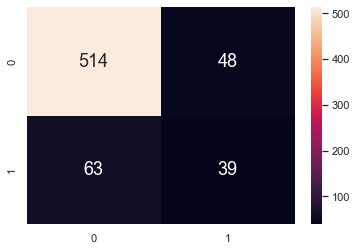

In [187]:
rforest = RandomForestClassifier(bootstrap=False, max_depth=50, max_features='log2', 
                                      min_samples_leaf=1, min_samples_split=2, n_estimators=300)

# Fit Random Forest on Train Data
y_train=np.ravel(y_train)
rforest.fit(X_train, y_train)
    

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t {:.8f}".format(rforest.score(X_test, y_test)))
print()
f1 = f1_score(y_test, y_test_pred)
print('F1 score  :\t {:.8f}'.format(f1))

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})

## Grid Search to refine the result from Randomized Search

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary of parameters to search
param_grid = {
    'bootstrap': [False],
    'max_depth': [30, 50, 70],
    'max_features':  ['log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [ 300, 400, 500,600]
}

# Create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

# create the scoring function
f1_scorer = make_scorer(f1_score)

# Create a grid search object
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1,scoring=f1_scorer)

y_train=np.ravel(y_train)
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print('Best Parameters:', grid_search.best_params_)
print('Best F1 Score:', random_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 400}
Best F1 Score: 0.32301651048639


Test Data
Accuracy  :	 0.84337349

F1 score  :	 0.42222222
TPR Test :	 0.37254901960784315
TNR Test :	 0.9288256227758007

FPR Test :	 0.0711743772241993
FNR Test :	 0.6274509803921569


<AxesSubplot:>

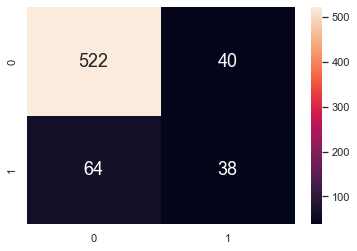

In [336]:
rforest = RandomForestClassifier(bootstrap=False, max_depth=50, max_features='log2', 
                                      min_samples_leaf=1, min_samples_split=4, n_estimators=400)

# Fit Random Forest on Train Data
y_train=np.ravel(y_train)
rforest.fit(X_train, y_train)
    

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t {:.8f}".format(rforest.score(X_test, y_test)))
print()
f1 = f1_score(y_test, y_test_pred)
print('F1 score  :\t {:.8f}'.format(f1))

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})

# Observation:
Using a Grid Search improved the performace of the Random Forest classifer. True Negative Rate (TNR) is high, at 0.92883 (5sf). This means that the classifer can predict Response 0 correctly 92.883% of the time. This is good

However, True Positive Rate is low, at 0.36275 (5sf), meaning the classifier can only predict Reponse 1 correctly 36.275% of the time. 

Overall, the f1 score, a metric measuring the accuracy of the model by combining precision and recall, is low at only 0.41341. Thus, Random Forest might not be the best classifier for People dataset. 

# <font color = pink> Random Forest Classifier adjustments
In conclusion, Random Forest classifier works well to predict True Negative cases in all 4 datasets but struggled with True Positive cases. The f1 score is low as well, suggesting Random Forest models do not predict very accurately

In [242]:
Response.value_counts()

Response
0           1880
1            331
dtype: int64

A possible reason for the poor results of Random Forest classifier is because of imbalanced dataset Response. Response 0 takes up 85.029% (3sf) of the dataset. We can mitigate this issue with class weight setting and Synthetic Minority Over-sampling Technique (SMOTE)

Class weight helps when the model is performing poorly on the minority value (Response = 1 in this dataset). By setting class_weight='balanced' in the random forest classifier, it will automatically calculate the class weights based on the number of samples in each class. The weight assigned to each class is inversely proportional to the number of samples in that class. Thus, the minority class will have a higher weight and the majority class will have a lower weight. This will result in the classifier giving more importance to the minority class during training, which can lead to better classification performance on the positive cases (True Positive). 

SMOTE (Synthetic Minority Over-sampling Technique) is a technique for oversampling the minority class in an imbalanced dataset by creating synthetic samples based on the existing minority samples. This ensures that the training data is less imbalanced and have better performance on positive cases.

# <font color = pink> Re-running Random Forest model on People dataset

In [343]:
from imblearn.over_sampling import SMOTE

from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
# Extract Response and Predictors
y = pd.DataFrame(Response)
X = pd.DataFrame(PeopleMulti)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [344]:
# define the parameter distributions to search over
param_dist = {'n_estimators': [100,200,300,400,500],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [10, 20, 30, 40, 50, None],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 5),
              'bootstrap': [True, False]}

# create the classifier object
rfc = RandomForestClassifier(random_state=42)

# create the scoring function
f1_scorer = make_scorer(f1_score)

# create the randomized search object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, scoring=f1_scorer)

y_train=np.ravel(y_train)
# fit the randomized search object to the data
random_search.fit(X_train, y_train)

# get the best parameters and the corresponding mean cross-validated score
print('Best Parameters:', random_search.best_params_)
print('Best F1 Score:', random_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.8138795878669726


In [345]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary of parameters to search
param_grid = {
    'bootstrap': [False],
    'max_depth': [20, 40, 60],
    'max_features':  ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [ 100,200,300, 400]
}

# Create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

# create the scoring function
f1_scorer = make_scorer(f1_score)

# Create a grid search object
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1,scoring=f1_scorer)

y_train=np.ravel(y_train)
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print('Best Parameters:', grid_search.best_params_)
print('Best F1 Score:', random_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.8138795878669726


Test Data
Accuracy  :	 0.75000000

F1 score  :	 0.35156250
TPR Test :	 0.4411764705882353
TNR Test :	 0.806049822064057

FPR Test :	 0.19395017793594305
FNR Test :	 0.5588235294117647


<AxesSubplot:>

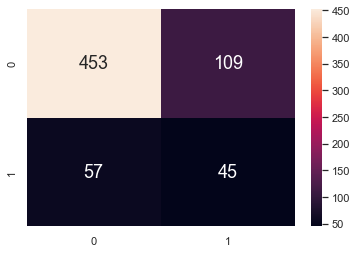

In [354]:
rforest = RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt', 
                                      min_samples_leaf=1, min_samples_split=5, n_estimators=200,class_weight='balanced')

# Fit Random Forest on Train Data
y_train=np.ravel(y_train)
rforest.fit(X_train, y_train)
    

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t {:.8f}".format(rforest.score(X_test, y_test)))
print()
f1 = f1_score(y_test, y_test_pred)
print('F1 score  :\t {:.8f}'.format(f1))

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})

# Observation:
The f1 score of this second model is lower than the first model (0.35156 vs 0.42222). Yet, this could be due to the first model being overfitted to the imbalance dataset. The first model may have been trained to predict the majority class most of the time, which results in better True Negative Rate and f1 score. However, this is misleading and we should actually adopt the second model for other datasets. 

Additionally, getting higher TPR is more valuable to the company as low TPR means that the company might miss out on potential true positive cases. In other words, the company is likely to miss out potential customer with Response = 1. This is undesirable for a profit-maximizing companies as they want to gain as much customers as possible. 

In [355]:
importances = rforest.feature_importances_

# Create dataframe of feature importances
df_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

df_imp

,Feature,Importance
2,Income,0.636719
5,Teenhome,0.113262
0,Education,0.078390
1,Marital_Status,0.069672
3,DurationJoined,0.055955
4,Kidhome,0.046003


# Observation
Importance score of the random forest classifier measure how much a feature contributes to the prediction of the model. From the result, Income has the astronomically higher importance score than the rest of the features. This means that the classifier uses a lot of information from Income to predict whether Response is 0 or 1. Hence, the company should focus on Income as the primary feature in the People dataset when creating new products and advertisement campaign.

# <font color = pink> Products Dataset

In [356]:
from imblearn.over_sampling import SMOTE

from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
# Extract Response and Predictors
y = pd.DataFrame(Response)
X = pd.DataFrame(Products)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [357]:
# define the parameter distributions to search over
param_dist = {'n_estimators': [100,200,300,400,500],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [10, 20, 30, 40, 50, None],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 5),
              'bootstrap': [True, False]}

# create the classifier object
rfc = RandomForestClassifier(random_state=42)

# create the scoring function
f1_scorer = make_scorer(f1_score)

# create the randomized search object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, scoring=f1_scorer)

y_train=np.ravel(y_train)
# fit the randomized search object to the data
random_search.fit(X_train, y_train)

# get the best parameters and the corresponding mean cross-validated score
print('Best Parameters:', random_search.best_params_)
print('Best F1 Score:', random_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best F1 Score: 0.8138795878669726


In [358]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary of parameters to search
param_grid = {
    'bootstrap': [False],
    'max_depth': [20, 40, 60],
    'max_features':  ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [100,200,300,400]
}

# Create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

# create the scoring function
f1_scorer = make_scorer(f1_score)

# Create a grid search object
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1,scoring=f1_scorer)

y_train=np.ravel(y_train)
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print('Best Parameters:', grid_search.best_params_)
print('Best F1 Score:', random_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best F1 Score: 0.8138795878669726


Test Data
Accuracy  :	 0.81927711

F1 score  :	 0.39393939
TPR Test :	 0.38235294117647056
TNR Test :	 0.8985765124555161

FPR Test :	 0.10142348754448399
FNR Test :	 0.6176470588235294


<AxesSubplot:>

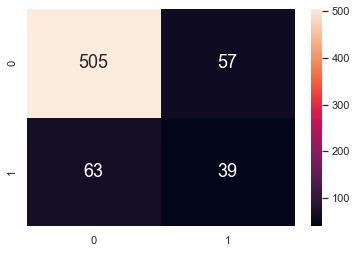

In [359]:
rforest = RandomForestClassifier(bootstrap=False, max_depth=40, max_features='sqrt', 
                                      min_samples_leaf=1, min_samples_split=3, n_estimators=200,class_weight='balanced')

# Fit Random Forest on Train Data
y_train=np.ravel(y_train)
rforest.fit(X_train, y_train)
    

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t {:.8f}".format(rforest.score(X_test, y_test)))
print()
f1 = f1_score(y_test, y_test_pred)
print('F1 score  :\t {:.8f}'.format(f1))

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})

# Observation:
True Negative Rate (TNR) is high, at 0.89858 (5sf). This means that the classifer can predict Response 0 correctly 89.858% of the time. This is good

However, True Positive Rate is low, at 0.38235 (5sf), meaning the classifier can only predict Reponse 1 correctly 38.235% of the time. 

Overall, the f1 score is low at only 0.39394. Thus, Random Forest might not be the best classifier for Products dataset. 

In [360]:
importances = rforest.feature_importances_

# Create dataframe of feature importances
df_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

df_imp

,Feature,Importance
0,MntWines,0.251306
2,MntMeatProducts,0.209345
5,MntGoldProds,0.190137
3,MntFishProducts,0.124639
1,MntFruits,0.115966
4,MntSweetProducts,0.108606


# Observation
MntWines is the most standout features in the importance score table with MnMeatProducts and MnGoldProductions following shortly behind while the rest of the features have relatively similar low score. This means that amount of Wines, Meat Products and Gold Products influence the Random Forest classifier the most, suggesting that customers might be more interestd in them than the rest of the products. Hence, the company should focus more on marketing and advertising Wines, Meat Products and Gold Products 

# <font color = pink> Promotion Dataset

In [369]:
from imblearn.over_sampling import SMOTE

from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
# Extract Response and Predictors
y = pd.DataFrame(Response)
X = pd.DataFrame(Promotion)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [368]:
# define the parameter distributions to search over
param_dist = {'n_estimators': [100,200,300,400,500],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [10, 20, 30, 40, 50, None],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 5),
              'bootstrap': [True, False]}

# create the classifier object
rfc = RandomForestClassifier(random_state=42)

# create the scoring function
f1_scorer = make_scorer(f1_score)

# create the randomized search object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, scoring=f1_scorer)

y_train=np.ravel(y_train)
# fit the randomized search object to the data
random_search.fit(X_train, y_train)

# get the best parameters and the corresponding mean cross-validated score
print('Best Parameters:', random_search.best_params_)
print('Best F1 Score:', random_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best F1 Score: 0.6884894778670566


In [370]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary of parameters to search
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,40,60],
    'max_features':  ['log2'],
    'min_samples_leaf': [2, 4,6],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [80,90,100,120]
}

# Create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

# create the scoring function
f1_scorer = make_scorer(f1_score)

# Create a grid search object
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1,scoring=f1_scorer)

y_train=np.ravel(y_train)
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print('Best Parameters:', grid_search.best_params_)
print('Best F1 Score:', random_search.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best F1 Score: 0.6884894778670566


Test Data
Accuracy  :	 0.79216867

F1 score  :	 0.42975207
TPR Test :	 0.5098039215686274
TNR Test :	 0.8434163701067615

FPR Test :	 0.15658362989323843
FNR Test :	 0.49019607843137253


<AxesSubplot:>

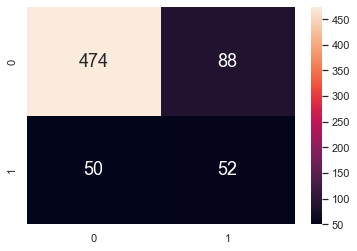

In [371]:
rforest = RandomForestClassifier(bootstrap=True, max_depth=20, max_features='log2', 
                                      min_samples_leaf=2, min_samples_split=3, n_estimators=100,class_weight='balanced')

# Fit Random Forest on Train Data
y_train=np.ravel(y_train)
rforest.fit(X_train, y_train)
    

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t {:.8f}".format(rforest.score(X_test, y_test)))
print()
f1 = f1_score(y_test, y_test_pred)
print('F1 score  :\t {:.8f}'.format(f1))

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})

# Observation:
True Negative Rate (TNR) is high, at 0.84342 (5sf). This means that the classifer can predict Response 0 correctly 84.342% of the time. This is good

However, True Positive Rate is average, at 0.50980 (5sf), meaning the classifier can only predict Reponse 1 correctly 50.980% of the time. 

Overall, the f1 score is low at only 0.42975. Thus, Random Forest might not be the best classifier for Promotion dataset. 

In [372]:
importances = rforest.feature_importances_

# Create dataframe of feature importances
df_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

df_imp

,Feature,Importance
3,AcceptedCmp3,0.274417
0,NumDealsPurchases,0.259664
5,AcceptedCmp5,0.250459
1,AcceptedCmp1,0.171401
4,AcceptedCmp4,0.033544
2,AcceptedCmp2,0.010514


# Observation:
Features AcceptedCmp3, AcceptedCmp5, AcceptedCmp1 have the highest importance score out of all 5 features. This suggests that the strategies used in first, third and fifth campaigns were decisive in getting Response 0 or 1 from the customers. Hence, the company should review these strategies and elaborate on them for future use and revise the strategies applied for the second and fourth campaigns

# <font color = pink> Places Dataset

In [373]:
from imblearn.over_sampling import SMOTE

from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
# Extract Response and Predictors
y = pd.DataFrame(Response)
X = pd.DataFrame(Place)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [374]:
# define the parameter distributions to search over
param_dist = {'n_estimators': [100,200,300,400,500],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [10, 20, 30, 40, 50, None],
              'min_samples_split': randint(2, 10),
              'min_samples_leaf': randint(1, 5),
              'bootstrap': [True, False]}

# create the classifier object
rfc = RandomForestClassifier(random_state=42)

# create the scoring function
f1_scorer = make_scorer(f1_score)

# create the randomized search object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, scoring=f1_scorer)

y_train=np.ravel(y_train)
# fit the randomized search object to the data
random_search.fit(X_train, y_train)

# get the best parameters and the corresponding mean cross-validated score
print('Best Parameters:', random_search.best_params_)
print('Best F1 Score:', random_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score: 0.8083723264462959


In [375]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a dictionary of parameters to search
param_grid = {
    'bootstrap': [False],
    'max_depth': [30, 50, 70],
    'max_features':  ['log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [120,150,200,250]
}

# Create a random forest classifier object
rfc = RandomForestClassifier(random_state=42)

# create the scoring function
f1_scorer = make_scorer(f1_score)

# Create a grid search object
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5, n_jobs=-1,scoring=f1_scorer)

y_train=np.ravel(y_train)
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean cross-validated score
print('Best Parameters:', grid_search.best_params_)
print('Best F1 Score:', random_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 200}
Best F1 Score: 0.8083723264462959


Test Data
Accuracy  :	 0.68222892

F1 score  :	 0.27986348
TPR Test :	 0.4019607843137255
TNR Test :	 0.7330960854092526

FPR Test :	 0.2669039145907473
FNR Test :	 0.5980392156862745


<AxesSubplot:>

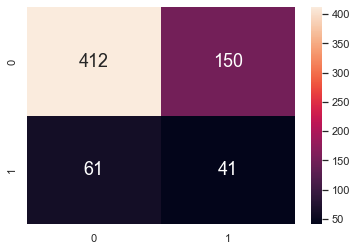

In [376]:
rforest = RandomForestClassifier(bootstrap=False, max_depth=30, max_features='log2', 
                                      min_samples_leaf=4, min_samples_split=3, n_estimators=200,class_weight='balanced')

# Fit Random Forest on Train Data
y_train=np.ravel(y_train)
rforest.fit(X_train, y_train)
    

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t {:.8f}".format(rforest.score(X_test, y_test)))
print()
f1 = f1_score(y_test, y_test_pred)
print('F1 score  :\t {:.8f}'.format(f1))

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})

# Observation:
True Negative Rate (TNR) is above average, at 0.73310 (5sf). This means that the classifer can predict Response 0 correctly 73.310% of the time.

However, True Positive Rate is low, at 0.40196 (5sf), meaning the classifier can only predict Reponse 1 correctly 40.196% of the time. 

Overall, the f1 score is low at only 0.27986. Thus, Random Forest might not be the best classifier for Promotion dataset. 

In [377]:
importances = rforest.feature_importances_

# Create dataframe of feature importances
df_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
df_imp = df_imp.sort_values(by='Importance', ascending=False)

df_imp

,Feature,Importance
1,NumCatalogPurchases,0.38345
0,NumWebPurchases,0.31573
2,NumStorePurchases,0.30082


# Observation:
NumCatalogPurchases is the feature with slightly higher importance score than the other two features. This suggests that number of purchases made using a catalogue contributes slightly more in decision for Response to be 0 or 1. The company may look to take advantage of this and push for lucrative discounts for customers using Catalogue, to gain better sales. 

# <font color = pink> Final conclusion of Random Forest
Using Random Forest classifier yields relatively low f1 score (all below 0.5). This meant thaUsing Random Forest classifier yields relatively low f1 score (all below 0.5). This meant that Random Forest classifier might not be the best tool to predict Response of a customer and additional machine learning methods are need to produce better insights. 

# <font color = pink> Association Rule Mining
Association rule mining is a data mining technique used to discover the relationships between variables in a dataset. It works by identifying frequent itemsets, which are sets of items that occur together in a significant number of transactions. Association rules are then generated from these frequent itemsets, which describe the relationships between the items.

In [179]:
df = NewNumerical.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Kidhome', 'Teenhome'], axis=1)
df['Education'] = People['Education'].replace(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], [2, 4, 3, 0, 1])
df['Marital_Status']=People['Marital_Status'].replace(['Single', 'Together', 'Married', 'Divorced', 'Widow'], [0,1,2,3,4])
df = df[df['Response'] == 1]
df

,ID,Education,Marital_Status,Income,DurationJoined,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,TotalExpenditure,TotalChildren
0,5524,2,0,58138.0,11,58,3,8,10,4,7,0,1,1617,0
8,4855,4,1,30351.0,10,19,1,3,0,2,9,0,1,46,1
15,2114,4,0,82800.0,11,23,1,7,6,12,3,0,1,1315,0
33,7373,4,3,46610.0,11,8,6,4,1,6,6,0,1,302,2
39,2968,4,3,48948.0,10,53,2,7,10,5,6,0,1,902,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,8722,1,2,82347.0,11,38,1,7,7,10,3,0,1,1853,0
2194,7118,2,2,73803.0,11,61,2,9,5,6,6,0,1,1528,1
2198,2632,2,2,50501.0,10,10,7,5,4,4,6,0,1,500,2
2221,7366,3,0,75777.0,10,12,1,3,6,11,1,0,1,1438,0


In [181]:
# convert the dataset to a list of transactions
transactions = []
for idx in df.index:
    transaction = []
    for column in df.columns[:-1]:
        if df.loc[idx, column] == 1:
            transaction.append(column)
    transactions.append(transaction)

# encode the transactions as a binary matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df1 = pd.DataFrame(te_ary, columns=te.columns_)

# find frequent itemsets with a minimum support of 0.05
frequent_itemsets = apriori(df1, min_support=0.05, use_colnames=True)

# generate association rules with a minimum confidence of 0.5
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# filter the rules to only show rows where the consequent is "Response"
rules = rules[rules['consequents'].apply(lambda x: 'Response' in str(x))]

# print the rules
print(rules)

                               antecedents                    consequents  \
0                              (Education)                     (Response)   
1                         (Marital_Status)                     (Response)   
2                    (NumCatalogPurchases)                     (Response)   
4                      (NumDealsPurchases)                     (Response)   
5                        (NumWebPurchases)                     (Response)   
6                      (NumWebVisitsMonth)                     (Response)   
7      (NumDealsPurchases, Marital_Status)                     (Response)   
8   (NumDealsPurchases, NumWebVisitsMonth)                     (Response)   
10                     (NumWebVisitsMonth)  (NumDealsPurchases, Response)   

    antecedent support  consequent support   support  confidence      lift  \
0             0.066465            1.000000  0.066465    1.000000  1.000000   
1             0.181269            1.000000  0.181269    1.000000  1.00000

The rules in the result are as follows:

If a customer has the attribute 'Education', they are highly likely to respond to the marketing campaign.
If a customer has the attribute 'Marital_Status', they are highly likely to respond to the marketing campaign.
If a customer has the attribute 'NumCatalogPurchases', they are highly likely to respond to the marketing campaign.
If a customer has the attribute 'NumDealsPurchases', they are highly likely to respond to the marketing campaign.
If a customer has the attribute 'NumWebPurchases', they are highly likely to respond to the marketing campaign.
If a customer has the attribute 'NumWebVisitsMonth', they are highly likely to respond to the marketing campaign.
If a customer has the attributes 'NumDealsPurchases' and 'Marital_Status', they are highly likely to respond to the marketing campaign.
If a customer has the attributes 'NumDealsPurchases' and 'NumWebVisitsMonth', they are highly likely to respond to the marketing campaign.
If a customer has responded to the marketing campaign and has the attribute 'NumWebVisitsMonth', they are highly likely to have the attribute 'NumDealsPurchases'.

From these rules, we can infer that the ideal customer for this marketing campaign is someone who:
-Has a higher level of education

-Is married

-Has made purchases from the company's catalog, web, or deals offerings

-Visits the company's website frequently

To take advantage of this information, the company could focus their marketing efforts on these attributes, tailor their messaging and promotions to attract customers with these attributes, and invest in tactics that reach customers who exhibit these characteristics. 